In [1]:

from math import *
import numpy as np
import matplotlib.pyplot as plt

colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}

def Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu):
    "Returns the squeezing spectrum of a given parameter set"
    ## Useful parameters ##
    k     = 2*sqrt(rb*(1-rb)*(1-L/100))*kappa
    tau   = ktau/kappa
    kapb  = kappa*rb
    eps   = kappa*x
    Delta = delta*kappa
    
    ## Pre-allocation ##
    Squeez  = np.zeros((len(nu),3))
    
    ## Useful expressions ##
    ephinu  = k * np.exp( 1j*pi* (phi+2*nu*tau) )
    emphinu = k * np.exp( -1j*pi* (phi-2*nu*tau) )
    dm      = kappa - 1j*(2*pi*nu - Delta) + ephinu 
    dp      = kappa - 1j*(2*pi*nu + Delta) + emphinu
    fbm     = 2*kapb + np.conj(emphinu)
    fbp     = 2*kapb + ephinu
    mp      = np.abs(dp*dm - eps**2)
    nom     = eps/kapb * \
    ( np.real(np.exp(-1j*pi*theta) * (dp*np.conj(dm)+eps**2) * fbm * fbp) + \
    eps*(np.real(dm)*abs(fbm)**2 + np.real(dp)*abs(fbp)**2) )
    denom   = np.power(mp,2)
    var     = nom / denom
    #print(ephinu[100])
    #print(emphinu[100])
    #print(dm[100])
    #print(dp[100])
    #print(fbm[100])
    #print(fbp[100])
    #print(mp[100])
    #print(nom[100])
    #print(denom[100])
    #print(var[100])
    
    Squeez[:,0] = 10*np.log10( var + 1 )
    Squeez[:,1] = 10*np.log10( -eps*kapb*4/((kappa+eps)**2+(2*pi*nu)**2) + 1 )
    Squeez[:,2] = 10*np.log10( -eps*kappa*4/((kappa+eps)**2+(2*pi*nu)**2) + 1 )
    
    return Squeez

nu   = -40 + np.array(np.linspace(0,1,100000))*80
Squeezing_spectrum(20*pi,.5,5.,0,0,3.8833,1.,0.1,nu)

array([[-0.00179366, -0.05076557, -0.10213157],
       [-0.00180024, -0.05076747, -0.10213541],
       [-0.00180684, -0.05076937, -0.10213926],
       ..., 
       [-0.00180684, -0.05076937, -0.10213926],
       [-0.00180024, -0.05076747, -0.10213541],
       [-0.00179366, -0.05076557, -0.10213157]])

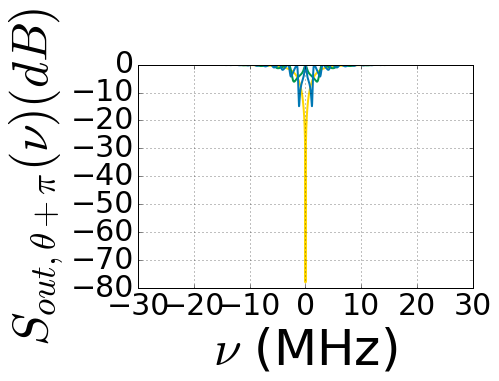

In [2]:
%matplotlib inline
from ipywidgets import interactive
from IPython.display import display
import ipywidgets as widgets  

def pyrag_plot(freqmin,freqmax,freqres,kappa,rb,L,delta,phi,ktau,theta,x):
    kappa = 2*pi*kappa
    nu = np.linspace(freqmin,freqmax,freqres)
    plt.figure("Pyragas plot")
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
    plt.plot(nu,Squeez[:,0],linewidth = 2.0,color = colors['brown'],label="whateher")
    plt.hold(True)
    plt.plot(nu,Squeez[:,2],linewidth = 2.0,color = colors['yellow'])
    ktau = ktau+2
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
    plt.plot(nu,Squeez[:,0],linewidth = 2.0,color = colors['green'])
    ktau = ktau+2
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
    plt.plot(nu,Squeez[:,0],linewidth = 2.0,color = colors['blue'])
    plt.hold(False)
    plt.xlabel('$\\nu$ (MHz)',fontsize = 50.0)
    plt.ylabel('$S_{out,\\theta+\pi}(\\nu) (dB)$',fontsize = 50.0)
    #plt.legend(loc = "best")
    plt.grid(True)
    plt.xticks(fontsize = 30.)
    plt.yticks(fontsize = 30.)
#    plt.xlim(-20.,20)
#    plt.ylim(-14.,.5)
    plt.show()

    
#Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta,x,nu)
freqmin_box  = widgets.FloatText(value = -25, description='$\\nu_{min}$')
freqmax_box  = widgets.FloatText(value = 25, description='$\\nu_{max}$')
freqres_box  = widgets.FloatText(value = 100000, description='$N_{\\nu}$')
kappa_box    = widgets.FloatText(value = 1, description='$\kappa (2\pi$ MHz$)$')
rb_slider    = widgets.FloatSlider(value = 0.5, min=0., max=1., step=0.01, description='$\kappa_b (\kappa)$')
L_slider     = widgets.FloatSlider(value = 5., min=0., max=100., step=1., description='$L (\%)$')
phi_slider   = widgets.FloatSlider(value = 1, min=-1., max=1., step=0.01, description='$\phi (\pi)$')
ktau_slider  = widgets.FloatSlider(value = 0, min=0., max=4., step=0.01, description='$\kappa\\tau$')
delta_slider = widgets.FloatSlider(value = 0, min=-1., max=1., step=0.01, description='$\Delta (\kappa)$')
x_slider     = widgets.FloatSlider(value = 1, min=0., max=2., step=0.01, description='$|\epsilon| (\kappa)$')
theta_slider = widgets.FloatSlider(value = 1, min=0., max=2., step=0.01, description='$\\theta^\prime-\\theta$')

pyrag = interactive(pyrag_plot,freqmin=freqmin_box,freqmax=freqmax_box,freqres=freqres_box,kappa=kappa_box,rb = rb_slider,\
                    L=L_slider,delta=delta_slider,phi = phi_slider,ktau = ktau_slider,theta=theta_slider,x = x_slider)
display(pyrag)


In [17]:
1-sqrt(1-.05)

0.025320565519103666

In [21]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
def Our_Squeezing(Om,k,phi,tau,gam,Delta,kapb,eps,theta):
    ## Pre-allocation ##
    Squeez  = np.zeros((len(Om),3))
    
    ## Useful expressions ##
    ephinu  = k * np.exp( 1j* (phi+Om*tau) )
    emphinu = k * np.exp( -1j* (phi-Om*tau) )
    dm      = gam/2 - 1j*(Om - Delta) + ephinu 
    dp      = gam/2 - 1j*(Om + Delta) + emphinu
    fbm     = 2*kapb + np.conj(emphinu)
    fbp     = 2*kapb + ephinu
    mp      = np.abs(dp*dm - eps**2)
    nom     = eps/kapb * \
    ( np.real(np.exp(-1j*pi*theta) * (dp*np.conj(dm)+eps**2) * fbm * fbp) + \
    eps*(np.real(dm)*abs(fbm)**2 + np.real(dp)*abs(fbp)**2) )
    denom   = np.power(mp,2)
    var     = nom / denom
    Squeez[:,0] = 10*np.log10( var + 1 )
    Squeez[:,1] = 10*np.log10( -eps*kapb*4/((gam/2+eps)**2+(Om)**2) + 1 )
    Squeez[:,2] = 10*np.log10( -eps*gam/2*4/((gam/2+eps)**2+(Om)**2) + 1 )
    return Squeez

def Furusawa_squeezing(T1,L1,T2,L2,la,l,x,rb,ktau):
    c = 3*10**8
    L1 = L1/100.
    L2 = L2/100.
    gam1  = c*T1/l
    gamL1 = c*L1/l
    gam2  = c*T2/l
    gamL2 = c*L2/l
    gam   = gam1+gamL1
    eps   = x*gam/2
    Om    = np.linspace(-170.,170.,100000)*10**6
    lb    = l-la
    taua  = la/c
    taub  = lb/c
    
    g   = eps*gam1/(((gam1+gamL1)/2-1j*Om)**2-eps**2)
    G   = ((gam1/2)**2-(gamL1/2-1j*Om)**2+eps**2)/(((gam1+gamL1)/2-1j*Om)**2-eps**2)
    Gb  = sqrt(gam1*gamL1)*((gam1+gamL1)/2-1j*Om)/(((gam1+gamL1)/2-1j*Om)**2-eps**2)
    gb  = sqrt(gamL1/gam1)*g
    
    alpha = -abs(G-g)*np.exp(1j*Om*(taua+taub))
    beta  = -abs(Gb-gb)*np.exp(1j*Om*taub)
    
    Xvar1 = abs(G-g)**2+abs(Gb-gb)**2
    Xvar2 = abs(sqrt(1-T2)+(T2*sqrt(1-L2)*alpha)/(1+alpha*sqrt((1-T2)*(1-L2))))**2+\
    (T2*(1-L2)*abs(beta)**2)/abs(1+alpha*sqrt(1-T2)*(1-L2))**2+\
    abs(sqrt(T2*L2)-sqrt(T2*(1-L2)*(1-T2)*L2)*alpha/(1+alpha*sqrt((1-T2)*(1-L2))))**2
    
    Sout1 = 10*np.log10(Xvar1)
    Sout2 = 10*np.log10(Xvar2)

    k     = 2*sqrt(rb*(1-rb)*(1-L2))*gam/2
    tau   = 2*ktau/gam
    kapb  = gam/2*rb
    Delta = 0.
    theta = 1.
    phi   = 0.
    Squeez = Our_Squeezing(Om,k,phi,tau,gam,Delta,kapb,eps,theta)    
    
    colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}
    
    plt.plot(Om/10**6/2/pi,Sout1,linewidth = 3.5,label = "without feedback",color=colors['blue'],linestyle="dotted")
    plt.hold(True)
    plt.plot(Om/10**6/2/pi,Sout2,linewidth = 2.5,label = "with feedback",color=colors['green'],linestyle='dashed')
    plt.plot(Om/10**6/2/pi,Squeez[:,0],linewidth = 2.5,label = "with delayed feedback",color=colors['brown'])
    
    
    plt.xlabel('$\\nu\, (MHz)$',fontsize = 27.0)
    plt.ylabel('$S_{out,\\theta+\pi}(\\nu) (dB)$',fontsize = 32.0)
    #plt.legend(loc = "best")
    plt.grid(True)
    plt.xticks(fontsize = 18.)
    plt.yticks(fontsize = 18.)
    plt.xlim(-20.,20)
    plt.ylim(-14.,.5)
    #plt.show()


In [22]:
#%matplotlib inline
plt.subplot(2,3,1)
plt.title('(a) $|\epsilon| = 0.1\kappa,\quad r = 0.5,\quad\kappa\\tau = 6$',fontsize = 30.0)
Furusawa_squeezing(.12,.5,.5,5,.25,.5,.1,.5,6.)
plt.subplot(2,3,2)
plt.title('(b) $|\epsilon| = 0.35\kappa,\quad r = 0.15,\quad \kappa\\tau = 3$',fontsize = 30.0)
Furusawa_squeezing(.12,.5,.85,5,.25,.5,.35,.5,3.)
plt.subplot(2,3,3)
plt.title('(c) $|\epsilon| = 0.6\kappa,\quad r = 0.03,\quad \kappa\\tau = 2$',fontsize = 30.0)
Furusawa_squeezing(.12,.5,.97,5,.25,.5,.6,.5,2.)
plt.subplot(2,3,4)
plt.title('(d) $|\epsilon| = 0.1\kappa,\quad r = 0.75,\quad\kappa\\tau = 6$',fontsize = 30.0)
Furusawa_squeezing(.12,.5,.25,5,.25,.5,.1,.5,6.)
plt.subplot(2,3,5)
plt.title('(e) $|\epsilon| = 0.35\kappa,\quad r = 0.35,\quad \kappa\\tau = 3$',fontsize = 30.0)
Furusawa_squeezing(.12,.5,.65,5,.25,.5,.35,.5,3.)
plt.subplot(2,3,6)
plt.title('(f) $|\epsilon| = 0.6\kappa,\quad r = 0.2,\quad \kappa\\tau = 2$',fontsize = 30.0)
Furusawa_squeezing(.12,.5,.8,5,.25,.5,.6,.5,2.)
plt.show()

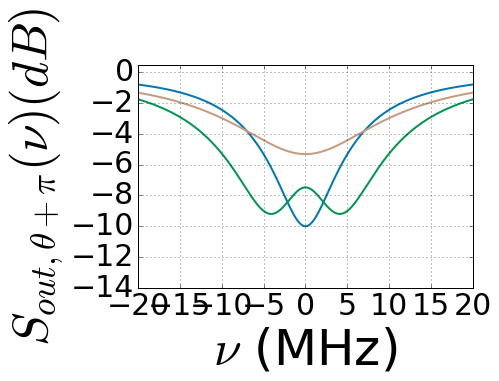

In [92]:
%matplotlib inline
from ipywidgets import interactive
from IPython.display import display
import ipywidgets as widgets  

T1_slider   = widgets.FloatSlider(value = 0.12, min=0., max=1., step=0.01, description='$T_1$')
L1_slider   = widgets.FloatSlider(value = 0.5, min=0., max=100., step=1., description='$L_1 (\%)$')
T2_slider   = widgets.FloatSlider(value = 0.8, min=0., max=1., step=0.01, description='$T_2$')
L2_slider   = widgets.FloatSlider(value = 5., min=0., max=100., step=1., description='$L_2 (\%)$')
la_slider   = widgets.FloatSlider(value = 0.25, min=0., max=1., step=0.1, description='$l_a (m)$')
l_slider    = widgets.FloatSlider(value = 0.5, min=0., max=1., step=0.1, description='$l (m)$')
x_slider    = widgets.FloatSlider(value = 0.6, min=0., max=1., step=0.01, description='$|\epsilon| (\gamma)$')
rb_slider   = widgets.FloatSlider(value = 0.5, min=0., max=1., step=0.01, description='$\gamma_a (\gamma)$')
ktau_slider = widgets.FloatSlider(value = 0.0, min=0., max=7., step=0.01, description='$\gamma\\tau$')

#    nui_fill     = widgets.FloatText(value=-25., description='Frequency min $(2\pi)$')
#    nuf_fill     = widgets.FloatText(value=25., description='Frequency max $(2\pi)$')
#    N_fill       = widgets.IntText(value=20., description='Resolution $\left(10^3 \\right)$')

w = interactive(Furusawa_squeezing,T1=T1_slider,L1=L1_slider,T2=T2_slider,L2=L2_slider,la = la_slider,l = l_slider,\
                x = x_slider,rb = rb_slider,ktau = ktau_slider)
display(w)


In [ ]:
from scipy.optimize import curve_fit
def Grav_plot(Ntheta,freqmin,freqmax,freqres,kappa,rb,L,phi,ktau,delta,x,gamparam):
    theta = np.linspace(0.,1.,Ntheta)
#    kappa = kappa*2*pi
    Om    = np.linspace(freqmin, freqmax, freqres)
    freq = np.zeros(Ntheta)
    thetamin = np.zeros(Ntheta)
    OurSqueez = np.zeros(freqres)
    
#    plt.figure()
 #   plt.hold(True)
    colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}
    colours = ['blue','green','yellow','brown','black']
    for i in range(0,Ntheta):
        Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta[i],x,Om)
        OurSqueez = Squeez[:,0]
#        thetamin[i] = OurSqueez[OurSqueez.argmin(axis=0)]
        freq[i] = Om[OurSqueez.argmin(axis=0)]*2*pi
        if Ntheta>5:
            if i % 15==0:
                plt.plot(Om*2*pi,OurSqueez,linewidth = 2.0,label = "$\\theta_d=$%.2f$\pi$" % theta[i])
            elif i == Ntheta-1:
                plt.plot(Om*2*pi,OurSqueez,linewidth = 2.0,label = "$\\theta_d=$%.2f$\pi$" % theta[Ntheta-1])
        else:
            plt.plot(Om*2*pi,OurSqueez,linewidth = 2.0,label = "$\\theta_d=$%.2f$\pi$" % theta[i]\
                 ,color=colors[colours[i]])

    plt.xlabel('$\\nu/\kappa$',fontsize = 35.0)
    plt.ylabel('$S_{out,\\theta^\prime}(\\nu) (dB)$',fontsize = 35.0)
    plt.legend(loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 25.0)
    plt.grid(True)
    plt.xticks(fontsize = 20.)
    plt.yticks(fontsize = 20.)
    plt.xlim(freqmin,freqmax)
    plt.ylim(-10.,10)
    plt.show()
    
    #param, pcov = curve_fit(Grav_theta, freq, theta,p0=[55.])
    #plt.figure()
    #plt.plot(freq,theta,'x')
    #plt.hold(True)
    #plt.plot(freq,Grav_theta(freq,param[0]))
    #print('$\gamma=$',param)
    #print('$\gamma=$',param/kappa)
    #print('the covariance is:',pcov)
    
    #plt.figure()
    #plt.plot(freq,Grav_theta(freq,gamparam))
    #plt.hold(True)
    #plt.plot(freq,theta,'x')
    #print(kappa)
    
def Grav_theta(om,gamma):
    return -np.arctan((om)**2*(gamma**2+(om)**2)/2/gamma**4)*2/pi+1

In [ ]:
#%matplotlib inline
from ipywidgets import interactive
from IPython.display import display
import ipywidgets as widgets  

Ntheta_box   = widgets.IntText(value = 5, description='$N_{\\theta}$') 
freqmin_box  = widgets.FloatText(value = 0, description='$\\nu_{min}$')
freqmax_box  = widgets.FloatText(value = 2.5, description='$\\nu_{max}$')
freqres_box  = widgets.FloatText(value = 100000, description='$N_{\\nu}$')
kappa_box    = widgets.FloatText(value = 1, description='$\kappa (2\pi$ MHz$)$')
rb_slider    = widgets.FloatSlider(value = 0.2, min=0., max=1., step=0.01, description='$\kappa_b (\kappa)$')
L_slider     = widgets.FloatSlider(value = 5., min=0., max=100., step=1., description='$L (\%)$')
phi_slider   = widgets.FloatSlider(value = -0.29, min=-1., max=1., step=0.01, description='$\phi (\pi)$')
ktau_slider  = widgets.FloatSlider(value = 2, min=0., max=4., step=0.01, description='$\kappa\\tau$')
delta_slider = widgets.FloatSlider(value = -0.2, min=-1., max=1., step=0.01, description='$\Delta (\kappa)$')
x_slider     = widgets.FloatSlider(value = 0.5, min=0., max=2., step=0.01, description='$|\epsilon| (\kappa)$')
gamparam_slider = widgets.FloatSlider(value = 0.8, min=0., max=5., step=0.01, description='$\gamma$ parameter')

wgrav = interactive(Grav_plot,Ntheta=Ntheta_box,freqmin=freqmin_box,freqmax=freqmax_box,freqres=freqres_box,kappa=kappa_box,L=L_slider,\
                phi = phi_slider,x = x_slider,rb = rb_slider,ktau = ktau_slider,delta=delta_slider,gamparam=gamparam_slider)
display(wgrav)


In [8]:
#%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit

Ntheta = 100
kappa  = 1
theta = np.linspace(0.,1.,Ntheta)
Om    = np.linspace(0, 2.5, 100000)
freq = np.zeros(Ntheta)
thetamin = np.zeros(Ntheta)
OurSqueez = np.zeros(100000)
rb = 0.2
L  = 5
phi = -0.29
ktau = 2.
delta = -.2
x = 0.5
gamma = 0.8

def Grav_theta(om,gamma):
    return -np.arctan((om)**2*(gamma**2+(om)**2)/2/gamma**4)*2/pi

for ithet in range(0,Ntheta):
    Squeez = Squeezing_spectrum(kappa,rb,L,delta,phi,ktau,theta[ithet],x,Om)
    OurSqueez = Squeez[:,0]
    freq[ithet] = Om[OurSqueez.argmin(axis=0)]*2*pi
    
#param, pcov = curve_fit(Grav_theta, abs(freq), theta,p0=[17.])
#gam = param/kappa

colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}

plt.figure()
plt.plot(freq,theta-1,'*',markersize = 10.0,markeredgecolor = colors['green'],label = "Calculated")
plt.hold(True)
plt.plot(freq,Grav_theta(freq,gamma),linewidth = 2.0,color = colors['brown'],label = "Optimal")
plt.grid(True)
plt.xlabel("$\\nu/\kappa$",fontsize = 35)
plt.ylabel("$\\theta^\prime-\\theta-1 \ (\pi)$",fontsize = 35)
plt.xticks(fontsize = 20.)
plt.yticks(fontsize = 20.)
plt.xlim(0,1.06)
plt.ylim(-1,0.)
plt.text(0.2,-0.8,"$\gamma = $ %.2f" % gamma + "$\kappa$",fontsize = 20.,\
         bbox=dict(facecolor='none', edgecolor='black',boxstyle = 'round'))
plt.legend(loc = 'best',fontsize = 20)
#print('$\gamma=$',param/kappa)
#print('the covariance is:',pcov)
plt.show()  